# 0.0 IMPORT

In [1]:
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import numpy                 as np
import tensorflow            as tf
from IPython.display         import Image
from sklearn.preprocessing   import RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics         import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, classification_report
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree            import DecisionTreeClassifier
import pylab
import pickle
import inflection            #trabalhar com nome das variaveis

%matplotlib inline

## 0.1. Help Functions

In [2]:
def tamanhoGrafico():
    pylab.rcParams['figure.figsize'] = (18.0, 18.0)

## 0.2. Loading Dataset

In [3]:
df_raw = pd.read_csv('rh-dados.csv')

# 1.0 DESCRIÇÃO DOS DADOS

In [4]:
df1 = df_raw.copy()

In [5]:
cols_old = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

minuscula = lambda x: inflection.underscore(x)

cols_new = list(map(minuscula, cols_old))

df1.columns = cols_new

## 1.2. Dimensão dos dados

In [6]:
print ('Numero de linhas: {}'.format(df1.shape[0]))
print ('Numero de colunas: {}'.format(df1.shape[1]))

Numero de linhas: 1470
Numero de colunas: 35


## 1.3. Tipo de dados

In [7]:
df1.dtypes

age                            int64
attrition                     object
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_count                 int64
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over18                        object
over_time                     object
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
standard_hours                 int64
s

## 1.4. Check NA

In [8]:
df1.isna().sum()

age                           0
attrition                     0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over18                        0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

## 1.5. Descrição Estatística

In [9]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])

cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

In [10]:
df1.describe()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 1.5.1. Atributos Categóricos

In [11]:
cat_attributes.apply(lambda x: x.unique().shape[0])

attrition          2
business_travel    3
department         3
education_field    6
gender             2
job_role           9
marital_status     3
over18             1
over_time          2
dtype: int64

# 2.0 FEATURE ENGINEERING

In [12]:
df2 = df1.copy()

## 2.1. Mapa Mental

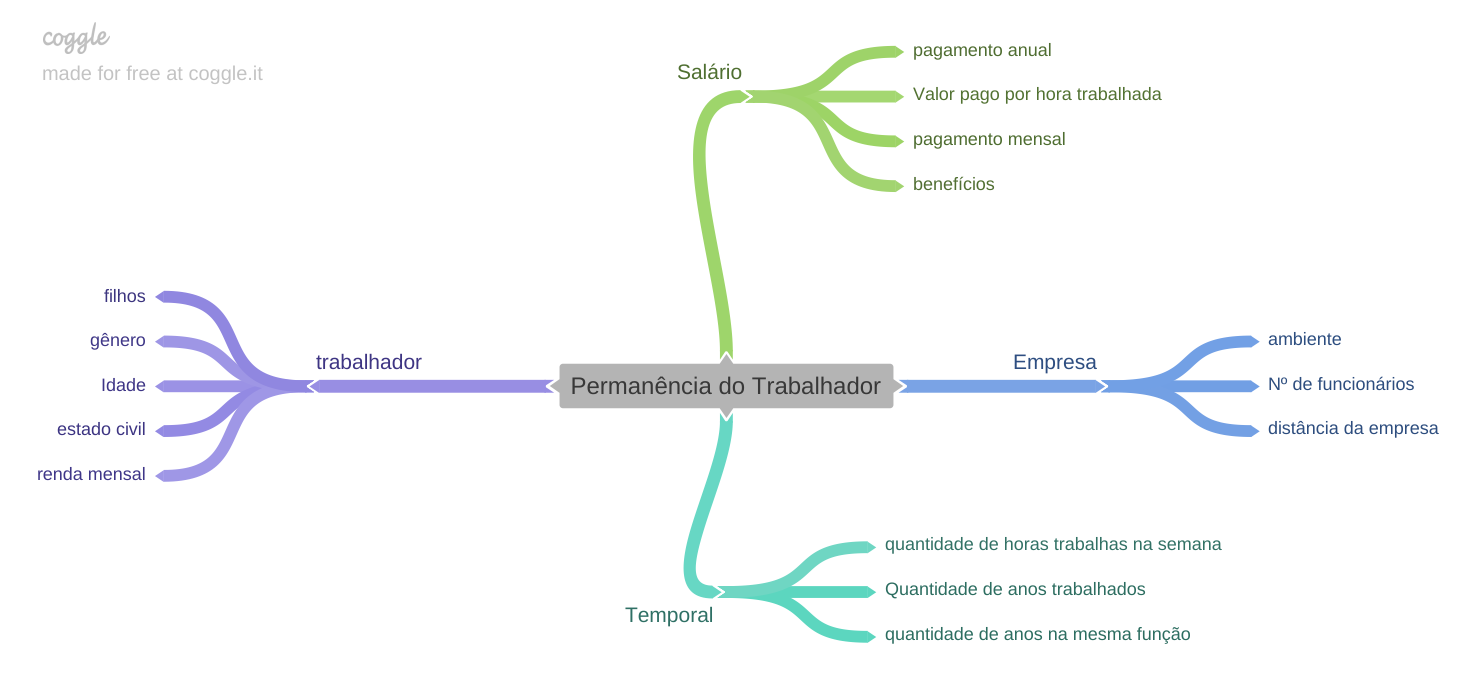

In [13]:
Image('mapamental-rh.png')

## 2.2 Criação de Hipóteses

**1.** Funcionários mais velhos deveriam ter menos tendêcia a sair da empresa.


**2.** Funcionários com mais tempo de educação deveriam ter uma maior tendência em sair da empresa.


**3.** Funcionários com uma maior distância da empresa deveriam ter uma maio tendência em trocar de empresa.


**4.** Funcionários com uma maior satisfação no trabalho deveria ter uma tendência menor em tocar de empresa.


**5.** Quanto maior o aumento percentual do salário menor deveria ser a tendência de troca de empresa.


**6.** Quanto maior o equilibro da vida profissional menor a tendência de trocar de empresa.


**7.** Quanto mais tempo se passou da ultima promoção maior deveria ser a tendência de trocar de empresa.


**8.** Funcionários com mais anos de trabalho deveriam ter uma tendência menor de torcar de empresa.


**9.** Quanto maior o tempo na função atual menor deveria ser a tendência de trocar de empresa.

## 2.3 Feature Engineering

In [14]:
novos_valores = {'Yes':1, 'No':0}
df2['attrition'] = df2['attrition'].map(novos_valores)

# 3.0 FILTRAGEM DE VARIAVEIS

In [15]:
df3 = df2.copy()

## 3.1. Seleção das Colunas

In [16]:
cols_drop = ['employee_count', 'standard_hours']

df3 = df3.drop(cols_drop, axis = 1) #percorre a coluna inteira e dropa

# 4.0 ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [17]:
df4 = df3.copy()

## 4.1. Análise Univariada

### 4.1.1. Varíavel Resposta

C:\Users\usuario\.conda\envs\Recursos-Humanos\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


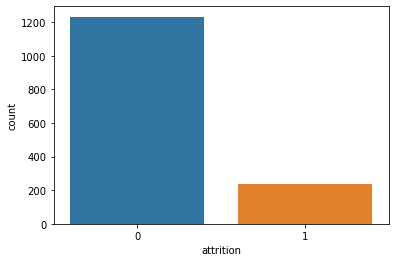

In [18]:
sns.countplot(df4['attrition']);

### 4.1.2. Variáveis Numéricas

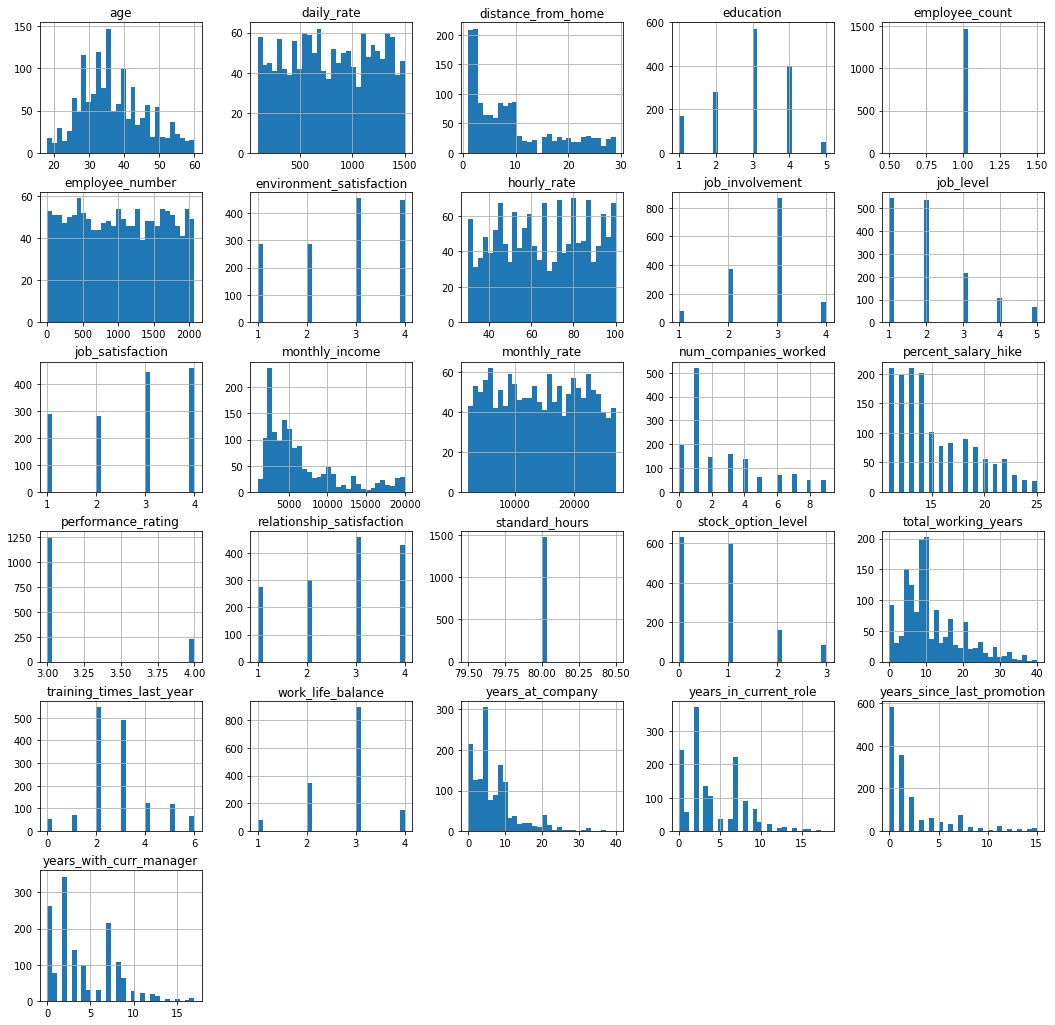

In [19]:
tamanhoGrafico()
num_attributes.hist(bins=30);

## 4.2 Análise Bivariada

### 1. Funcionários mais velhos deveriam ter menos tendêcia a sair da empresa.
**Verdade,** funcionários mais velhos deixam menos o trabalho

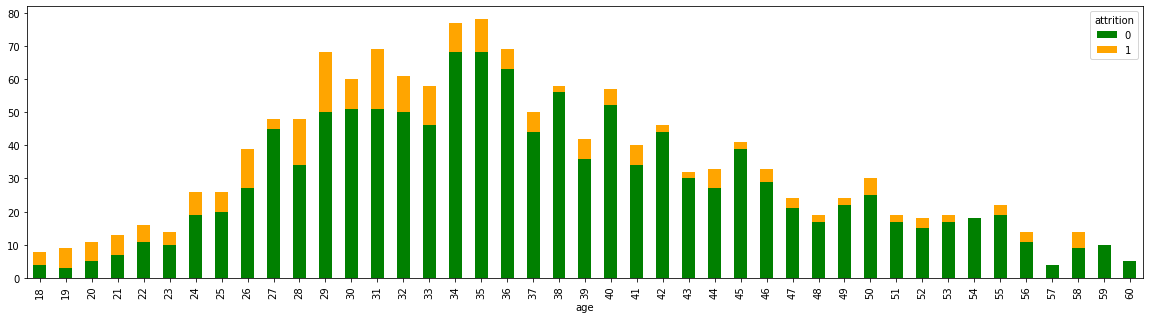

In [20]:
pd.crosstab(df4['age'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 2. Funcionários com mais tempo de educação deveriam ter uma maior tendência em sair da empresa.
**Verdade,** funcionários com maiores estudos deixam mais a empresa

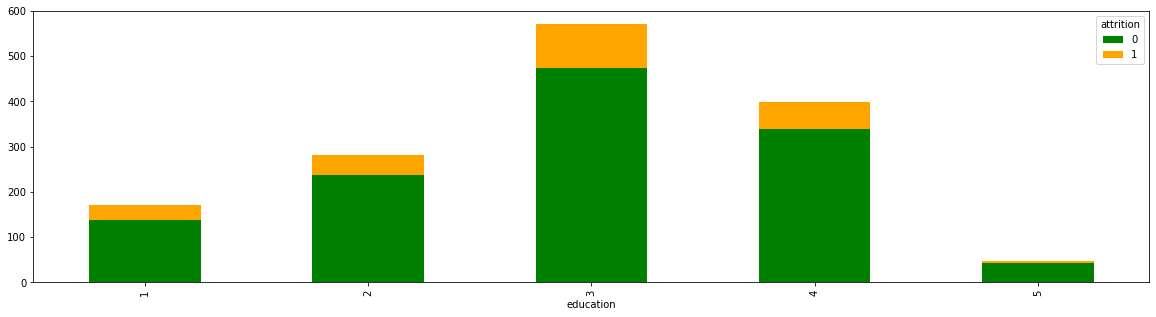

In [21]:
pd.crosstab(df4['education'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 3. Funcionários com uma maior distância da empresa deveriam ter uma maior tendência em trocar de empresa.
**Inconclusivo,** não foi possível analisar

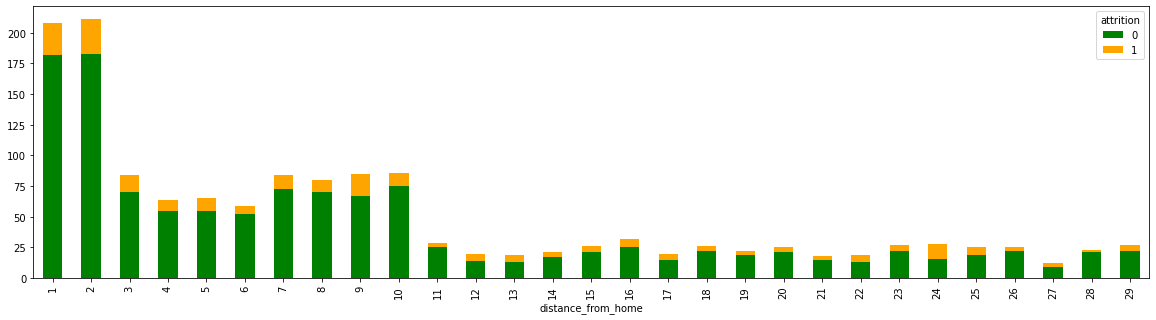

In [22]:
pd.crosstab(df4['distance_from_home'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 4. Funcionários com uma maior satisfação no trabalho deveria ter uma tendência menor em tocar de empresa.
**Inconclusiva,** não foi possível analisar.

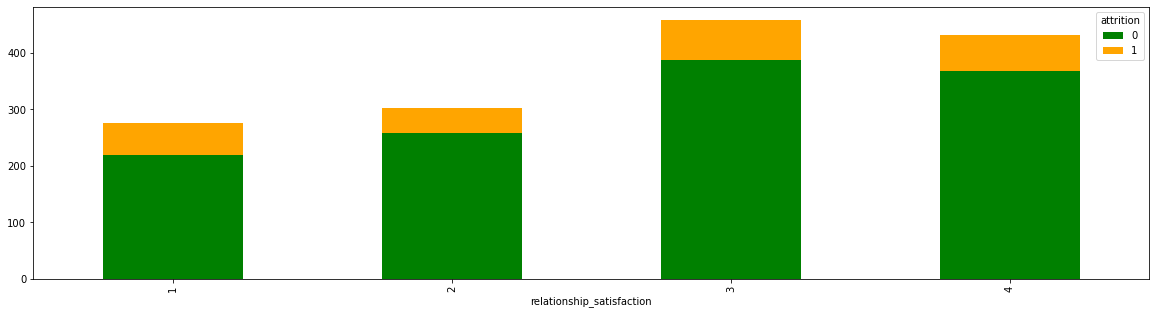

In [23]:
pd.crosstab(df4['relationship_satisfaction'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 5. Quanto maior o aumento do salário menor deveria ser a tendência de troca de empresa.
**Inconclusivo,** não é possível analisar

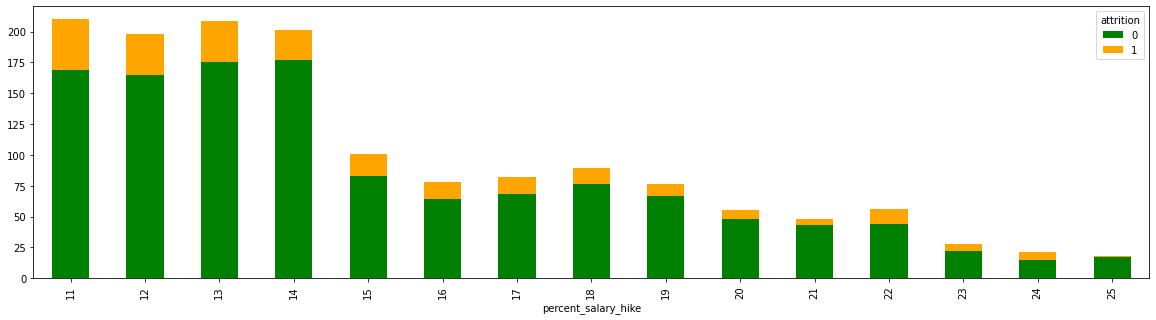

In [24]:
pd.crosstab(df4['percent_salary_hike'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 6. Quanto maior o equilibro da vida profissional menor a tendência de trocar de empresa.
**Verdadeiro,** quanto mais equilibrado, menos deixa a empresa

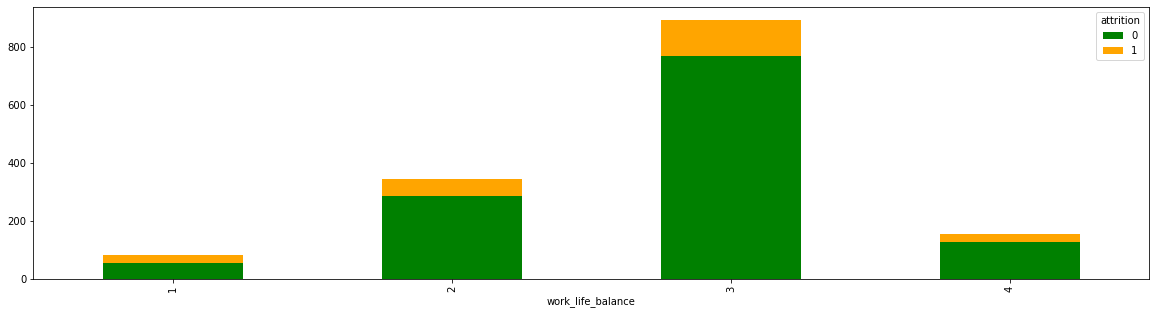

In [25]:
pd.crosstab(df4['work_life_balance'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 7. Quanto mais tempo se passou da ultima promoção maior deveria ser a tendência de trocar de empresa.
**Falso,** quanto maior tempo da ultima promoção, menos é a tendência de troca de emprego

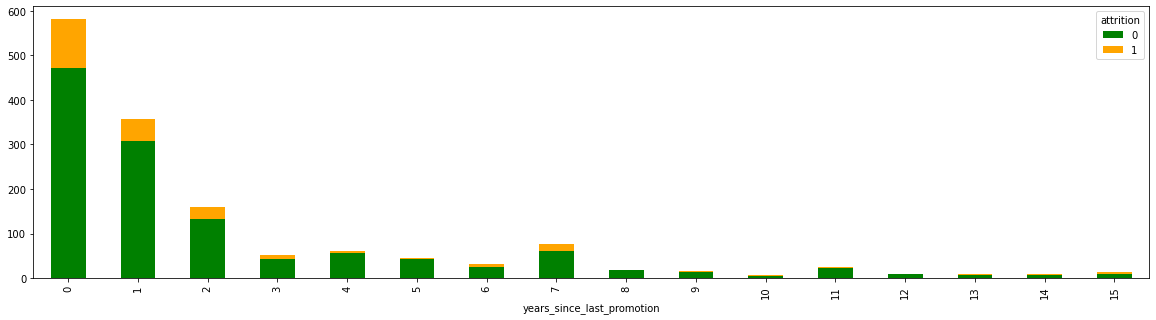

In [26]:
pd.crosstab(df4['years_since_last_promotion'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 8. Funcionários com mais anos de trabalho deveriam ter uma tendência menor de torcar de empresa.
**Verdadeira,** quanto mais anos trabalhos, menos vontade há de trocar de empresa

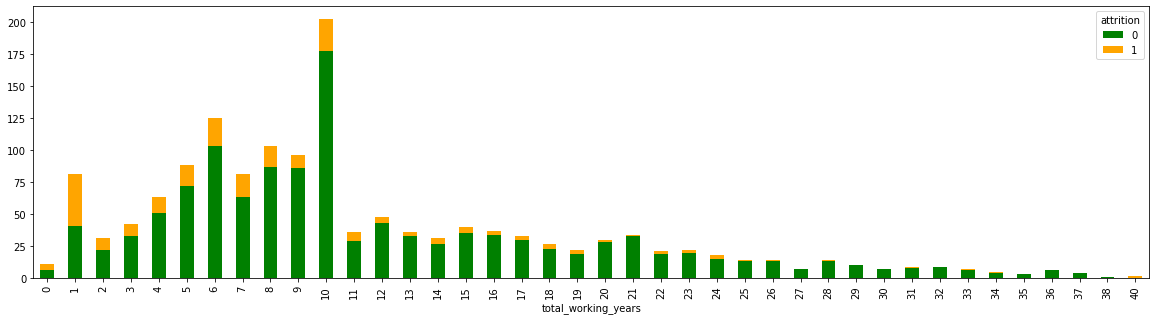

In [27]:
pd.crosstab(df4['total_working_years'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 9. Quanto maior o tempo na função atual menor deveria ser a tendência de trocar de empresa.
**Inconclusivo,** não é possível analisar

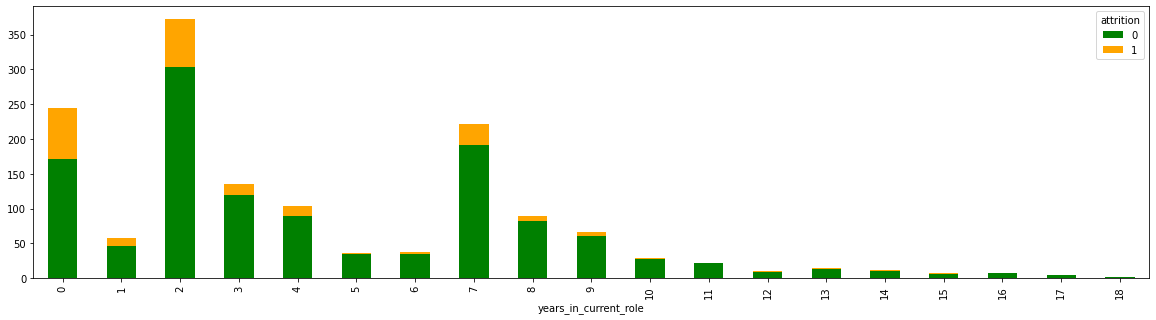

In [28]:
pd.crosstab(df4['years_in_current_role'], df4['attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 4.3. Análise Multivariada

### 4.3.1 Variáveis Numéricas

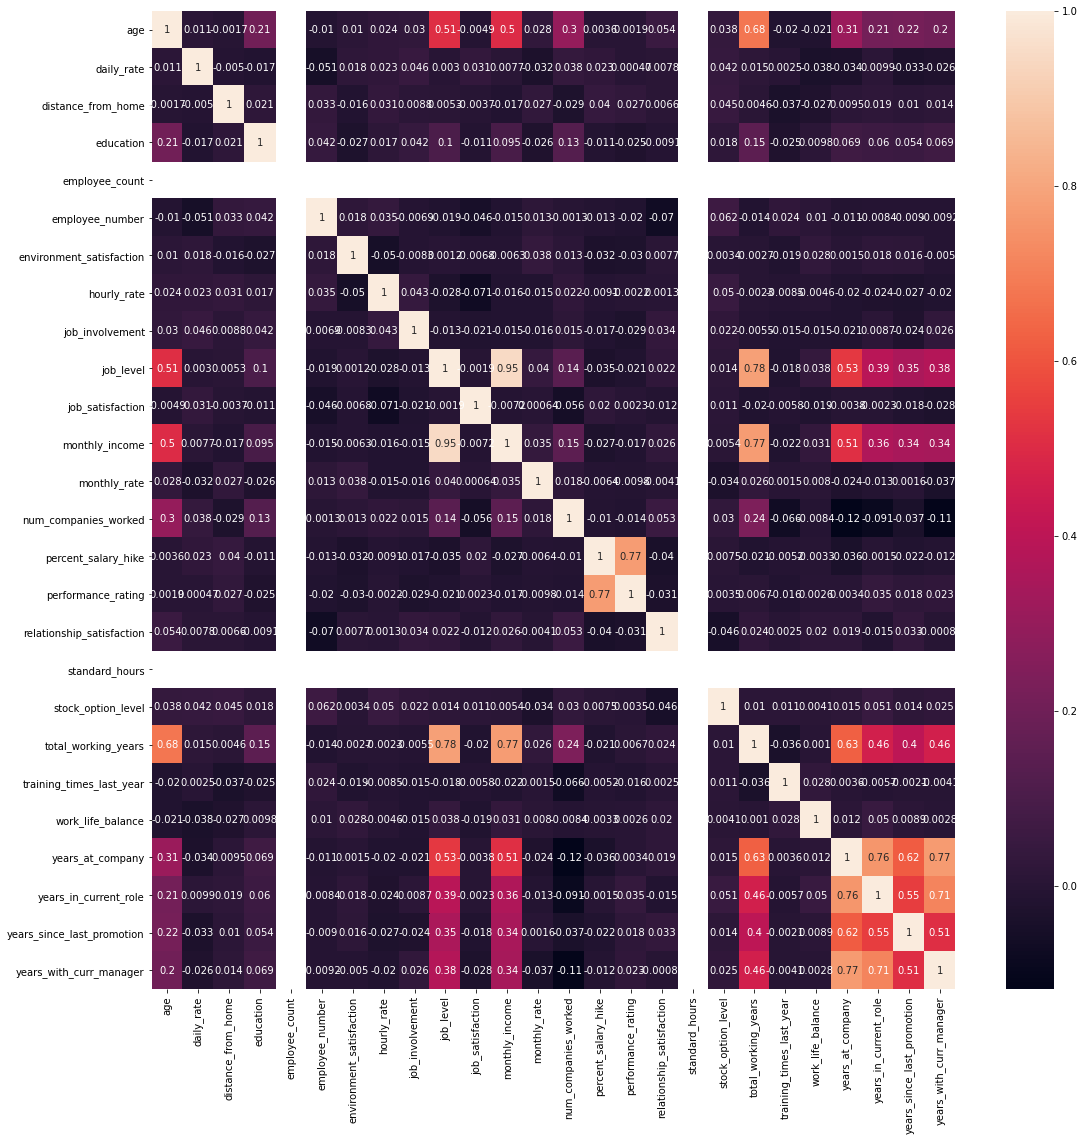

In [29]:
correlacao = num_attributes.corr(method = 'pearson')
sns.heatmap(correlacao, annot = True);

# 5.0 PREPARAÇÃO DOS DADOS

In [30]:
df5 = df4.copy()

## 5.1. Encoding

In [31]:
X_cat = cat_attributes[['business_travel', 'department', 'education_field',
       'gender', 'job_role', 'marital_status']]

onn = OneHotEncoder()

X_cat = onn.fit_transform(X_cat).toarray()

X_cat = pd.DataFrame(X_cat)

X_numerical = num_attributes[['age', 'daily_rate', 'distance_from_home', 'education',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'hourly_rate', 'job_involvement', 'job_level', 'job_satisfaction',
       'monthly_income', 'monthly_rate', 'num_companies_worked',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager']]

df = pd.concat([X_numerical, X_cat], axis=1)

In [32]:
df_all = pd.concat( [df, df5['attrition']], axis=1 )

## 5.2. Balanceamento da variável resposta

In [33]:
x = df_all.iloc[:,0:52]
y = df_all.iloc[:, -1]

smote = SMOTE()

x, y = smote.fit_resample(x,y)

## 5.3. Rescaling

In [34]:
mms = MinMaxScaler()

x = mms.fit_transform(x)

# 6.0 MODELO DE MACHINE LEARNING

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## 6.1 Regressão Logística

In [36]:
regr_logist = LogisticRegression()
regr_logist.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = regr_logist.predict(X_test)
accuracy_score(y_test, y_pred)*100

84.21052631578947

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       254
           1       0.84      0.83      0.84       240

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



## 6.2 Random Forest

In [39]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)*100

91.29554655870446

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       254
           1       0.97      0.85      0.90       240

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494



## 6.3 Decision Tree

In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)*100

83.60323886639675

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       254
           1       0.83      0.83      0.83       240

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



## 6.4. Redes Neurais

In [45]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=30, activation='relu', input_shape=(52, )))
rede_neural.add(tf.keras.layers.Dense(units=30, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=30, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [46]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1590      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
_________________________________________________________________


In [47]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
rede_neural.fit(X_train, y_train, epochs = 200)

Epoch 1/200
62/62 [==============================] - 1s 662us/step - loss: 0.6762 - accuracy: 0.5749
Epoch 2/200
62/62 [==============================] - 0s 490us/step - loss: 0.5605 - accuracy: 0.7255
Epoch 3/200
62/62 [==============================] - 0s 490us/step - loss: 0.4295 - accuracy: 0.8114
Epoch 4/200
62/62 [==============================] - 0s 540us/step - loss: 0.3915 - accuracy: 0.8219
Epoch 5/200
62/62 [==============================] - 0s 621us/step - loss: 0.3386 - accuracy: 0.8640
Epoch 6/200
62/62 [==============================] - 0s 507us/step - loss: 0.3323 - accuracy: 0.8704
Epoch 7/200
62/62 [==============================] - 0s 490us/step - loss: 0.2934 - accuracy: 0.8951
Epoch 8/200
62/62 [==============================] - 0s 556us/step - loss: 0.2871 - accuracy: 0.8797
Epoch 9/200
62/62 [==============================] - 0s 605us/step - loss: 0.2633 - accuracy: 0.8981
Epoch 10/200
62/62 [==============================] - 0s 550us/step - loss: 0.2556 - accura

62/62 [==============================] - 0s 474us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 82/200
62/62 [==============================] - 0s 474us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 83/200
62/62 [==============================] - 0s 507us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 84/200
62/62 [==============================] - 0s 534us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 85/200
62/62 [==============================] - 0s 507us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/200
62/62 [==============================] - 0s 523us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/200
62/62 [==============================] - 0s 572us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 88/200
62/62 [==============================] - 0s 670us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 89/200
62/62 [==============================] - 0s 556us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 90/200
62/62 [==============================] - 0s 503us/step - loss: 9.2944e-04 - accura

62/62 [==============================] - 0s 578us/step - loss: 3.9319e-05 - accuracy: 1.0000
Epoch 159/200
62/62 [==============================] - 0s 474us/step - loss: 3.7027e-05 - accuracy: 1.0000
Epoch 160/200
62/62 [==============================] - 0s 490us/step - loss: 3.3580e-05 - accuracy: 1.0000
Epoch 161/200
62/62 [==============================] - 0s 491us/step - loss: 3.4179e-05 - accuracy: 1.0000
Epoch 162/200
62/62 [==============================] - 0s 572us/step - loss: 3.6071e-05 - accuracy: 1.0000
Epoch 163/200
62/62 [==============================] - 0s 523us/step - loss: 3.2866e-05 - accuracy: 1.0000
Epoch 164/200
62/62 [==============================] - 0s 490us/step - loss: 2.6114e-05 - accuracy: 1.0000
Epoch 165/200
62/62 [==============================] - 0s 490us/step - loss: 2.7852e-05 - accuracy: 1.0000
Epoch 166/200
62/62 [==============================] - 0s 638us/step - loss: 2.8027e-05 - accuracy: 1.0000
Epoch 167/200
62/62 [==============================

In [49]:
y_pred = rede_neural.predict(X_test)

In [50]:
y_pred = (y_pred >= 0.5)

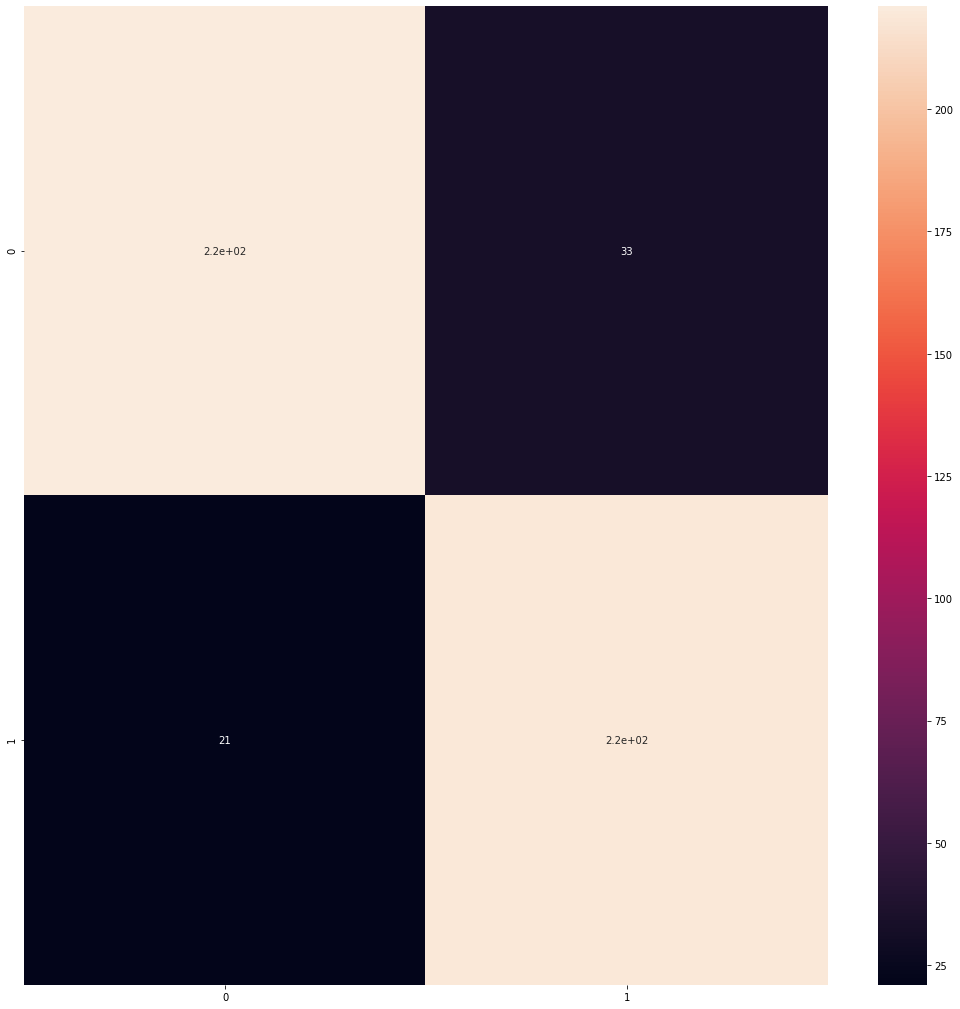

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True);

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       254
           1       0.87      0.91      0.89       240

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



# 7.0 SALVANDO O CLASSIFICADOR

In [53]:
with open('variaveismodelo.pkl', 'wb') as f:
    pickle.dump([smote, onn, mms, random_forest], f)